In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_x(omega, t, x0=0):
    xleft = x0/np.pi
    omega = int(omega/np.pi)
    x = ((xleft+omega*t)%2)
    x = x*np.pi
    return x

In [3]:
def sample_x(R,Fs,tfinal):
    omega = 2*np.pi*(R+2)
    samples = tfinal*Fs
    gap = 1.0/Fs
    xs = []
    ts = []
    ts1 = []
    i = 0
    t = 0
    while(i<samples):
        ts.append(t)
        t+=gap
        ts1.append(i+1)
        i+=1
    ts = np.around(ts,decimals=6)
    i=0
    while(i<samples):
        xs.append(generate_x(omega,ts[i]))
        i+=1
    return xs,ts1

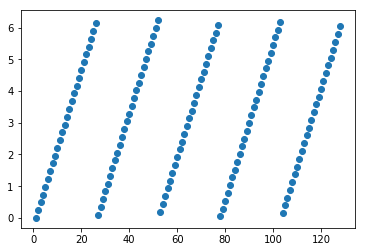

In [4]:
xs ,ts1 = sample_x(3,128,1)
plt.plot(ts1, xs,'o')

In [5]:
def split_train_and_test(R,xs,ts):
    X = np.zeros((len(xs),2))
    for i in range(len(xs)):
        X[i][0] = xs[i]
        X[i][1] = i+1
    np.random.seed(R+2)
    np.random.shuffle(X)
    train = X[:10,:]
    test = X[10:,:]
    return train,test

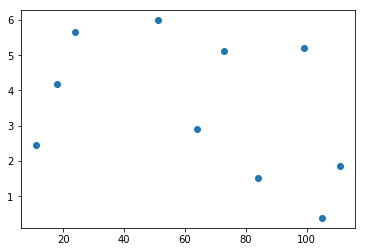

In [6]:
xs,ts = sample_x(3,128,1)
train,test = split_train_and_test(3,xs,ts)
n = []
theta_n = []
for i in range(len(train)):
    n.append(train[i][1])
    theta_n.append(train[i][0])
plt.plot(n,theta_n,'o')

In [9]:
def plot_graphs(n,theta_n,theta_y,m,ex):
    plt.title("D = "+str(m)+", N = "+str(len(theta_n))+" "+ex)
    plt.plot(n,theta_n,'o')
    plt.plot(n,theta_y,'ro')

    

def least_square_method(train,test,Fs,M):
    least = np.Infinity
    optimum_m=0
    n,theta_n,n1,theta_n1=[],[],[],[]
    for i in range(len(train)):
        n.append(train[i][1])
        theta_n.append(train[i][0])
    
    for i in range(len(test)):
        n1.append(test[i][1])
        theta_n1.append(test[i][0])
        
    for i in range(len(M)):
        m = M[i][0]
        phi = np.zeros((len(train),m+1))
        phi_test = np.zeros((len(test),m+1))
        for i in range(len(test)):
            for j in range(m+1):
                phi_test[i][j] = pow(test[i][1]/Fs,j)
        for i in range(len(train)):
            for j in range(m+1):
                phi[i][j] = pow(train[i][1]/Fs,j)
        t = np.zeros((len(train),1))
        for i in range(len(train)):
            t[i][0] = train[i][0]
        weights = np.dot(np.linalg.inv(np.dot(phi.T,phi)),np.dot(phi.T,t))
        res = np.dot(phi,weights)
        res1 = np.dot(phi_test,weights)
        E = np.dot((t-np.dot(phi,weights)).T,t-np.dot(phi,weights))
        loss = np.sum(E)
        print(loss)
        if(loss<least):
            least=loss
            optimum_m = m
        theta_y,theta_y1 = [],[]
        for i in range(len(train)):
            theta_y.append(res[i][0])
        for i in range(len(test)):
            theta_y1.append(res1[i][0])
        print("original train data")
        plot_graphs(n,theta_n,theta_y,m,"train")
        plt.show()
        print("original test data")
        plot_graphs(n1,theta_n1,theta_y1,m,"test")
        plt.show()
    print(optimum_m)

16.782755548110494
original train data


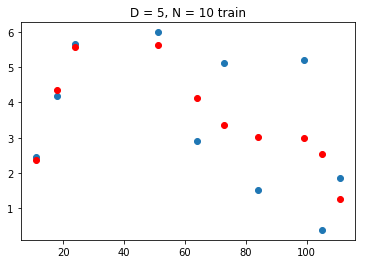

original test data


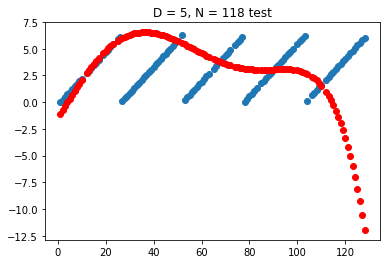

4.244506990872081
original train data


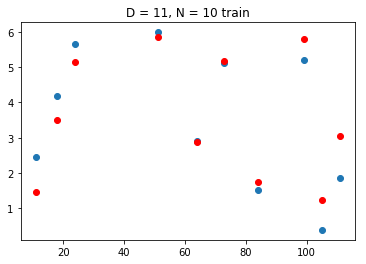

original test data


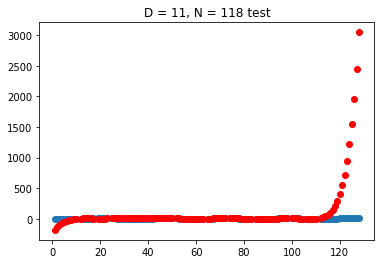

191.70752285560232
original train data


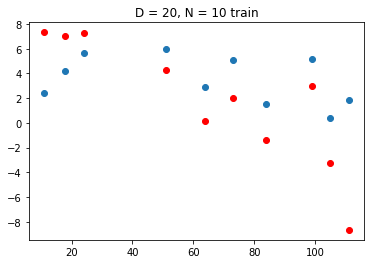

original test data


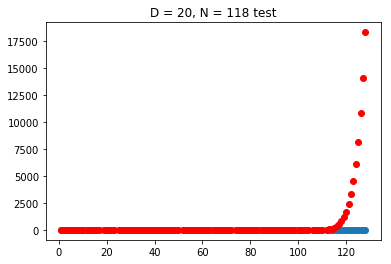

11


In [10]:
M = np.array([[5],[11],[20]])
xs,ts = sample_x(3,128,1)
train,test = split_train_and_test(3,xs,ts)
least_square_method(train,test,128,M)